# Project 3 Task 2 Linear and Multivariable Regression - Python SKlearn

# Abstact

# Introduction

# Linear and Multivariable Regression Modeling

In [247]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # For data splitting 
from sklearn.linear_model import LinearRegression # For modelling of the splitted dataset 
from sklearn.metrics import mean_squared_error, r2_score  # For model accuracy preformance analysis


[1.58977881] 0.573626630605534
Mean Squared Error: 0.034285449786934555
Root Mean Squared Error: 0.18516330572479678
R-Square: 0.771928213679968


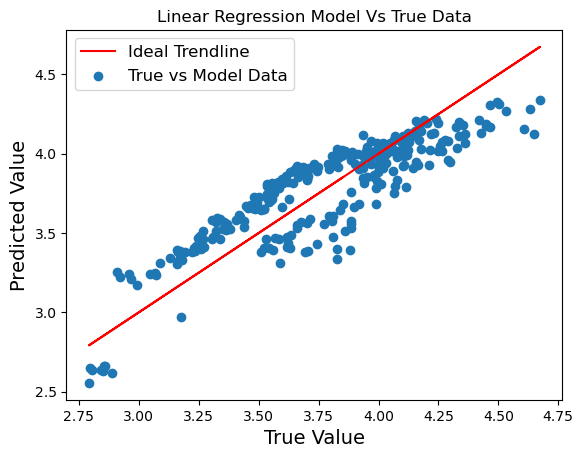

My_Model R2= 0.7595410262368063
r_adjusted = 0.7697491838743626


In [276]:
# Step 2: Import/Reading the dataset of synthetic and pre-processed drilling data with file name synthetic.xlsx: 
df=pd.read_excel('CleanOutlier1.xlsx')

# Step 3: Define Input (Feature) and Output(Target) Variable   
#By convention, we used the Capital letter X for input features and the small letter y, for the target variable
#Step 3a: Featuure and Target variables selection for Linear regression
#X = df[['x']] # Here use double parenthesis
#y = df['y']  # Here use singe parenthesis


#X = df[['NEU']] # Here use double parenthesis
#X = df[['DEN']] # Here use double parenthesis
X = df[['Vs']] # Here use double parenthesis
y = df['Vp']  # Here use singe parenthesis
      
#Step 3b: Featuure and Target variables selection for Multivariable regression
#X = df[['DEN', 'NEU']] # Here use double parenthesis
#X = df[['DEN', 'Vs']] # Here use double parenthesis
#X = df[['Vs', 'NEU']] # Here use double parenthesis
#X = df[['DEN', 'Vs', 'NEU']] # Here use double parenthesis
#y = df['Vp']

# Another method of selecting features for Multivaraibale regression. select all features excep the last
#X = df.iloc[:,0:-1].values  # Except the last column, i.e y
#y = df.iloc[:,-1].values # Only the last column , i.e y


#Step 3c: Split the data for training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


#Step 4 Machine learning modeling and prediction
#We use a class called lineraRegression model to perform training.
# Class LinearRegression as a function called .fit() used to generate the optimized coefficients
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #Fit function

# Step 5 Prediction
# Class LinearRegression as a function called .predict() used to perform model prediction by using the optimized coefficients
y_pred = regressor.predict(X_test)

# If we want to see the optimized coefficients, we will use print(use....coef_,  regressor.intercept_ )
print (regressor.coef_,regressor.intercept_)
#print( regressor.coef_[0])

# Step 6 Model Performance Accuracy Evaluations
# Function to calculate the R^2 based on the predicted and true dataset:
mse = mean_squared_error(y_test, y_pred)  # Mean square sum error between the prediction and the true value
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Root means square error between the prediction and the true value
r2 = r2_score(y_test, y_pred)  # Regression coefficient 

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:',rmse)
print('R-Square:',r2 )

# Step 7 Plotting
# Scatter plot (Predicted vs True) and Ideal Trendline
plt.plot(y_test,y_test, '-r')
plt.scatter(y_test, y_pred)

plt.title('Linear Regression Model Vs True Data')
plt.xlabel('True Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.legend(['Ideal Trendline', 'True vs Model Data'], loc='upper left', fontsize=12)
plt.show()


# Step 8 Co computation and performance analysis and plotting

Co_true = np.array(0.77*y_test**2.93)
Co_my_model = 0.77*y_pred**2.93
Co_Castagna =np.array(0.77*(1.16*X_test + 1.36)**2.93)
print('My_Model R2=', r2_score(Co_true, Co_my_model))  # Regression coefficient 


def r2_adj(n,p):
    return 1-(1-r2)*(n-1)/(n-p-1)

n = len(y_pred)
p = 3
print('r_adjusted =', r2_adj(n,p))  
#plt.plot(Co_true)
#plt.plot(Co_my_model)
#plt.show()

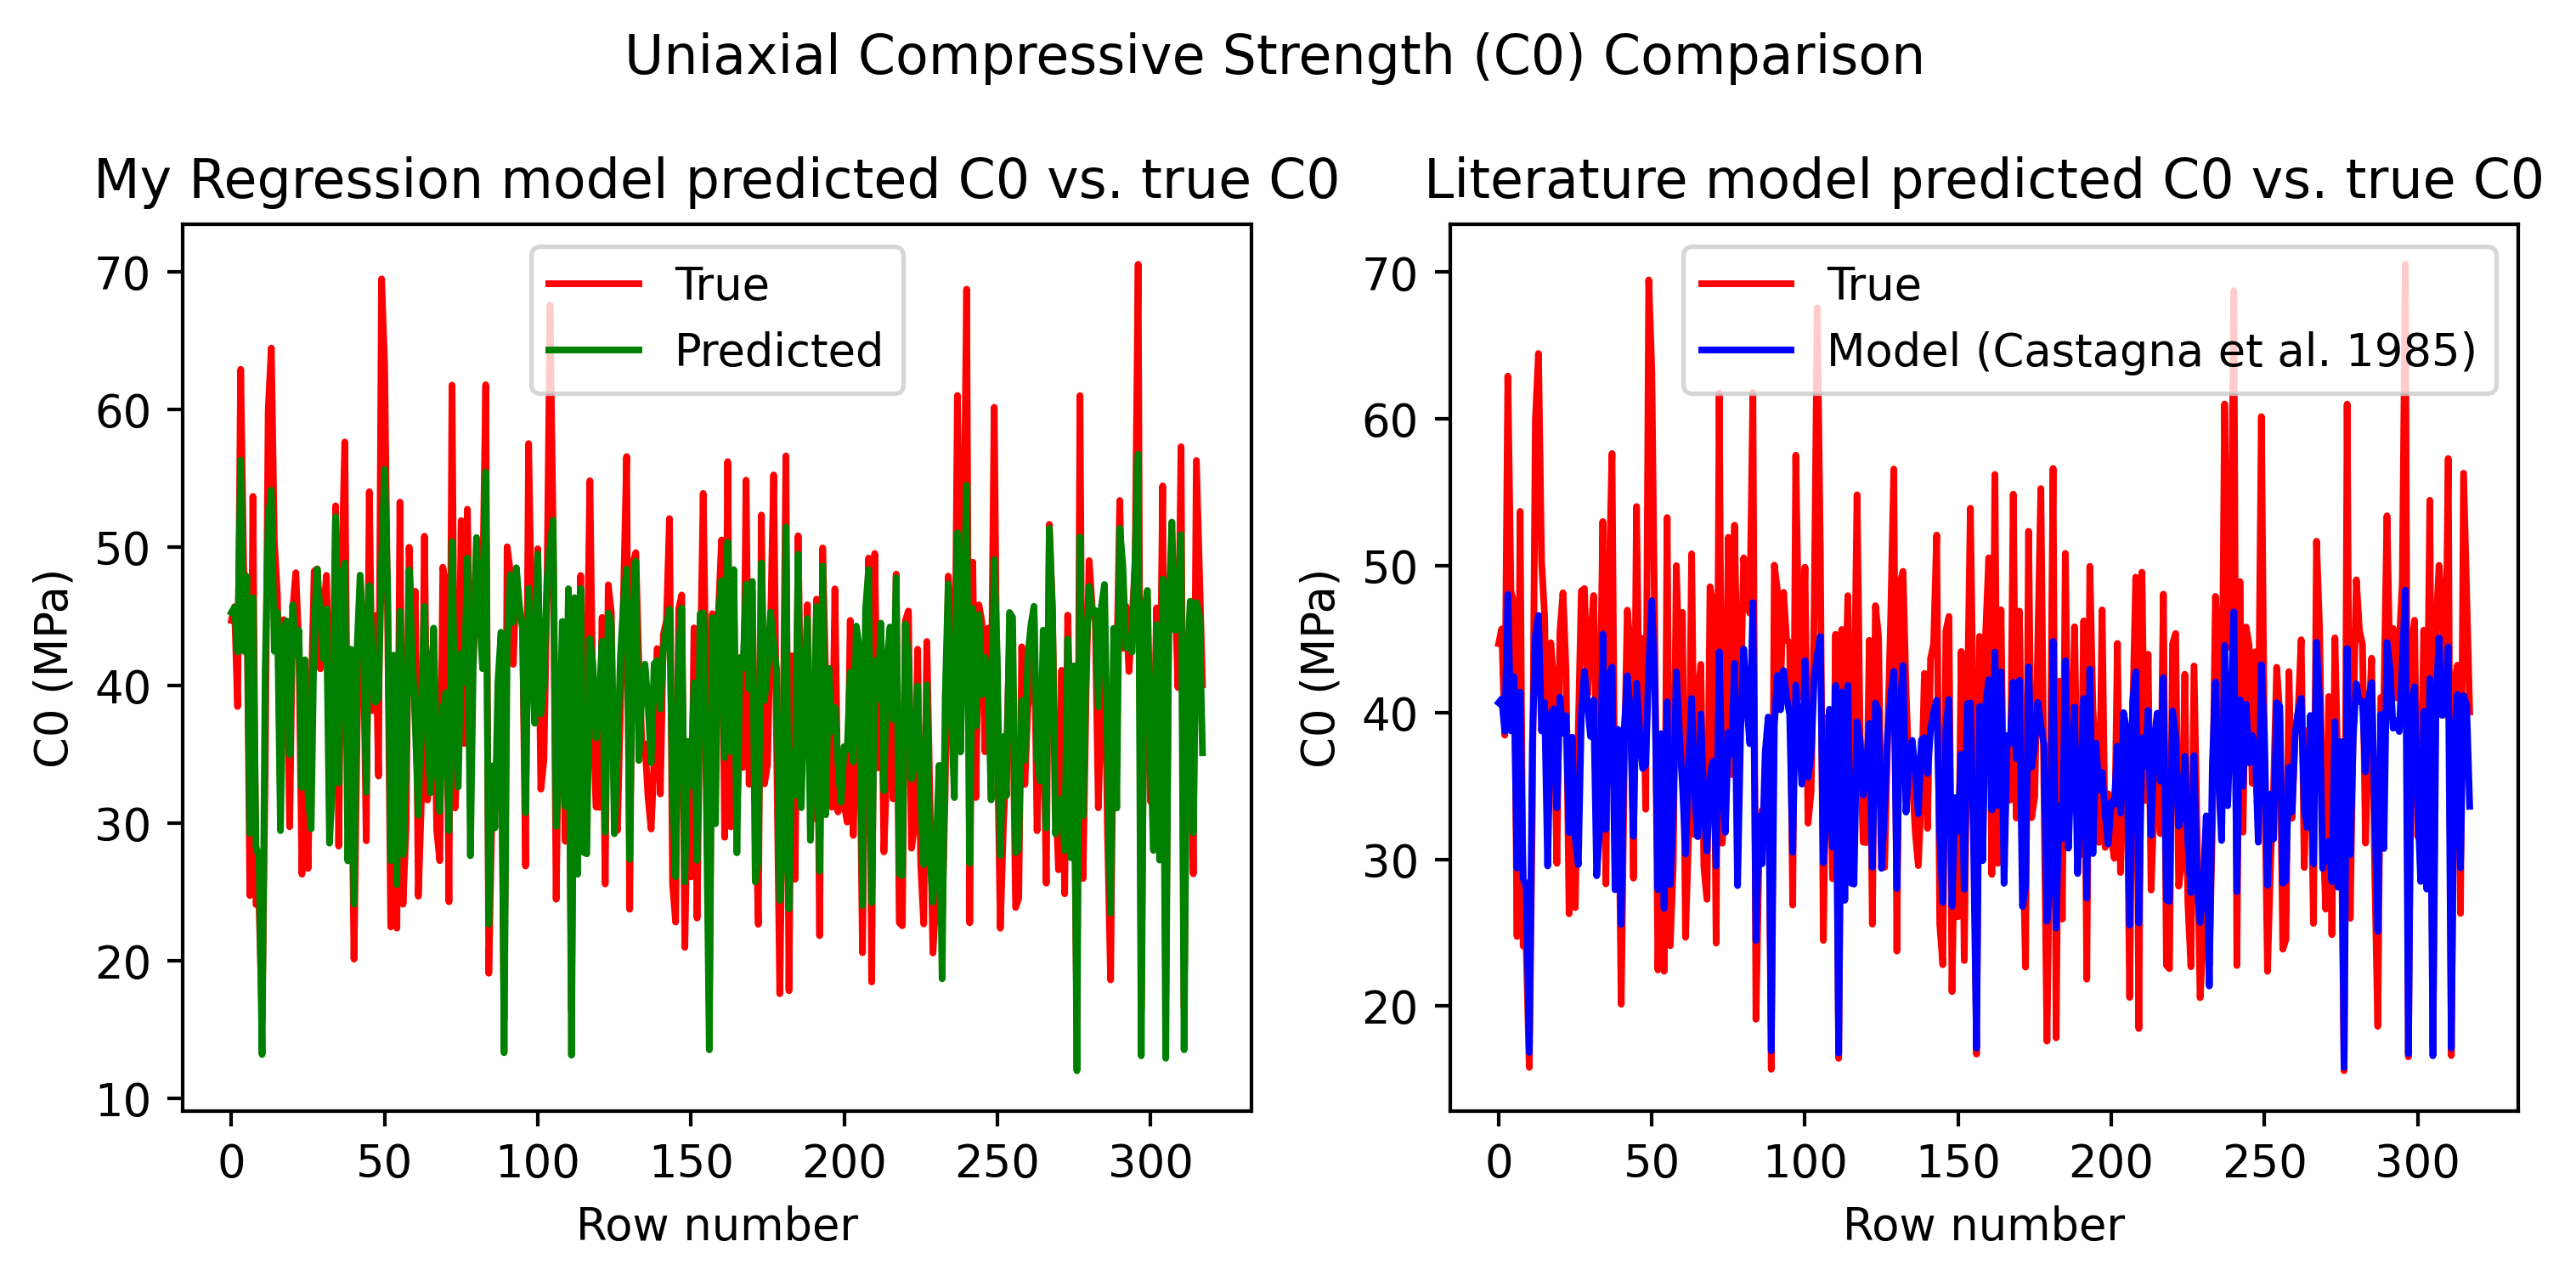

In [278]:
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(8,4), dpi = 380)

fig.suptitle("Uniaxial Compressive Strength (C0) Comparison")
# Plotting regression model predicted C0 and true C0
axes[0].plot(Co_true, label = "True", color = "red")
axes[0].plot(Co_my_model, label = "Predicted", color = "green")
axes[0].set_xlabel("Row number")
axes[0].set_ylabel("C0 (MPa)")
axes[0].set_title("My Regression model predicted C0 vs. true C0")
axes[0].legend()


# Plotting literature model (Castagna et al. (1985)) predicted C0 and true C0
axes[1].plot(Co_true, label = "True", color = "red")
axes[1].plot(Co_Castagna, label = "Model (Castagna et al. 1985)", color = "blue")
axes[1].set_xlabel("Row number")
axes[1].set_ylabel("C0 (MPa)")
axes[1].set_title("Literature model predicted C0 vs. true C0")
axes[1].legend()
plt.tight_layout()
plt.show()

## Here present the comparison of R2 in bar graph

# Discussion

# Reflection

# References

# Task 2 Exercise

## Linear regression

    Vp vs DEN 

    Vp vs NEU

    Vp vs Vs

    Compute literature based and compare with your model
        Gardner
        Castagna

## Multivaraible regression

    Vp vs DEN & NEU

    Vp vs DEN & Vs

    Vp vs Vs & NEU

    Vp vs Vs, DEN & NEU
 